In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

# Value-based methods

The simplest model-based approach are *Value-based* methods.

They revolve around the idea of
- assigning a state value function $\statevalfun_\pi(\state)$ to each state $\state \in \States$
$$
\statevalfun_{\pi}: \States \to \Reals
$$
- $\statevalfun_\pi(\state)$ is an approximation of 
$$
\E_\pi ( G_\tt  | \stateseq_\tt =  \state )
$$
the expected return achievable from state $\state$

Given $\statevalfun_\pi$, the optimal deterministic policy is

$$
\pi^*(\state) = \argmax{\,\,\,\,\,\,\,\,\act \\  \transp({ \state', \rew | \state, \act }) \ne 0}\statevalfun_\pi(\state')
$$

- From state $\state$
- Choose the action $\act$
- that results in next state $\state'$
- with maximal $\statevalfun_\pi(\state')$



Note: the $\argmax{}$ results in a *deterministic* policy.


We will show two broad classes of Value-based methods
- Model-based
- Model-free

<br>

    Value-Based Methods
    ├── Model-Based
    │   └── DP Methods
    │       ├── Value Iteration
    │       └── Policy Iteration
    │
    └── Model-Free
        ├── Monte Carlo (MC)
        ├── Temporal Difference (TD)
        └── Q-Learning



# Model-based Value methods

Using a value-based method is practical only if we can
discover the state value function $\statevalfun$, which is initially unknown.

Most methods are iterative in nature and create a sequence of increasingly accurate approximations of $\statevalfun$ 
$$
\statevalfun_{\pi,0} \ldots \statevalfun_{\pi,k} \ldots
$$

In the limit 
$$
\lim_{k \to \infty}  \statevalfun_{\pi,k} = \statevalfun_\pi 
$$

As we obtain an improved approximation $\statevalfun_{\pi, k+1}$ 
- we may reflect this improved knowledge by updating the policy

Thus, we periodically improve the policy based on improved approximations of $\statevalfun_\pi$

This results in a sequence of increasingly accurate approximations of the policy $\pi$

$$
\pi_0, \ldots, \pi_p, \ldots
$$
which hopefully converges to $\pi^*$.

## Dynamic Programming 

Given a model that describes the behavior of the Environment
- we can determine the value state function via Dynamic Programming (DP) based techniques.

as follows.

The expected returns from state $\state$
$$
\E_\pi ( G_\tt  | \stateseq_\tt =  \state )
$$

are computed via the *Bellman Equation*

$$
\begin{array} \\
\statevalfun_\pi(\stateseq_\tt) & = & \E_\pi ( G_\tt  | \stateseq_\tt =  \state ) \\
& = & \E_\pi  \left( \rewseq_{\tt+1} + \disc G_{\tt+1} | \stateseq_\tt =  \state  \right) & \text{immediate reward } \rewseq_{\tt+1} \\
    & & & \text{ plus discounted future rewards } G_{\tt+1} \\
& = & \E_\pi  \left( \rewseq_{\tt+1} + \disc \statevalfun_\pi ( \stateseq_{\tt+1})  | \stateseq_\tt =  \state  \right) & \text{since } \statevalfun_\pi ( \stateseq_{\tt+1}) = \E_\pi \left( G_{\tt+1} | \stateseq_\tt =  \state \right) \\
\end{array}
$$

The Bellman Equation asserts that
$$
\statevalfun_\pi(\stateseq_\tt)
$$

can be derived from
- the immediate reward $\rewseq_{\tt+1}$
- and the discounted (by $\gamma$) value of the successor state $\stateseq_{\tt+1}$
$$
\statevalfun_\pi ( \stateseq_{\tt+1}) 
$$

This recursive equation terminates 
- since the successor state $\stateseq_{\tt+1}$ on the RHS
- is one transition closer to the end 
of episode $\pi$ 
- than the LHS state $\stateseq_{\tt}$


## Interpreting the Expectation 

Expanding the expectation into a sum

\begin{array} \\
\statevalfun_\pi(\stateseq_\tt)
& = & \sum_{\act}  \pi(\act, \stateseq_\tt) \sum_{\state', \rew} \transp(\state', \rew | \stateseq_\tt, \act)  
    \left( \rew + \disc \statevalfun_\pi(\state') \right) & \text{expectation over all possible actions } \act \text{ from state } \state \\
    & & & \text{of immediate reward } \rew \\
    & & & \text{and discounted future reward} \\
    & & & \text{resulting from successor state } \state' \text{ of action } \act \\
\end{array}



This equation guides our approximation of
$\statevalfun_\pi(\stateseq_\tt) $ given current policy $\pi$

- for each action $\act$ that can be chosen by the Agent in state $\stateseq_\tt$
    - with probability $\pi(\act, \stateseq_\tt)$ (stochastic policy)
- use the return received from taking the action
    - determined by the Environment, which chooses
        - immediate reward $\rew$
        - successor state $\state'$
    - with probability $\transp(\state', \rew | \stateseq_\tt, \act) $ (stochastic environment)
- use the current approximation $v$ of the value of the successor state $state'$   
        


This equation can be computed only if we know the behavior of the Environment
- the reward and successor state chosen by the Environment
- given the Agent choosing action $\act$ in state $\stateseq_\tt$
- i.e.
$$
\transp(\state', \rew | \stateseq_\tt, \act) 
$$

Hence: this is *model-based* and not model-free.

Model-based methods have access to the Environment's behavior. 

This may come about because
- the model is given to us
- we incorporate methods to *learn* a model simultaneously with learning the Value function

For now: we assume the model is given to us.
    - 

**Simplifiction for deterministic policy or environment**


For deterministic policy $\pi$
- as given by 
    $$
\pi(\state) = \argmax{\,\,\,\,\,\,\,\,\act \\  \transp({ \state', \rew | \state, \act }) \ne 0}\statevalfun_\pi(\state')
$$
    - chose the action resulting in successor state with maximum state value

all the probability is concentrated at single action $\actseq_\tt$
$$
\pi(\stateseq_\tt, \act^*) = 1 \text{ for } \act^*  =\argmax{\,\,\,\,\,\,\,\,\act \\  \transp({ \state', \rew | \state, \act }) \ne 0}\statevalfun_\pi(\state')
$$
so you can drop the $\sum_{\act}  \pi(\act, \stateseq_\tt)$ from the equation
- and equate $\act = \actseq_\tt$



When the Environment is deterministic
all the probability is concentrated at a single response:
    
$$
\transp({ \stateseq_{\tt+1}, \rewseq_{\tt+1} | \stateseq_\tt, \actseq_\tt }) = 1
$$
and the Agent's policy chooses the $\actseq_\tt$ that results in a successor state $\state' = \stateseq_{\tt+1}$ that maximizes
$\statevalfun(\state')$
$$
\statevalfun_\pi(\stateseq_{\tt+1}) = \max{\state'}{\statevalfun_\pi(\state')}
$$

Thus, in the case of deterministic Policy and Environment, the RHS becomes


$$
\disc \left( \rewseq_{\tt+1} +  \max{\state'}{\statevalfun_\pi(\state')} \right) 
$$

which is how it typically appears.



## Value iteration method

The simplest method is to
- iteratively update the Value function
    - until convergence
- derive the *final* Policy from the Value function
    - chose the action leading to highest return
    - based on the Value function

**Pseudo code for Value Iteration**

Here is some pseudo-code

<br>

<table>
    <center><strong>Value iteration</strong></center>
    <tr>
        <img src="images/RL_value_iteration_alg.png" width=90%>
    </tr>
    

</table>

Attribution: http://incompleteideas.net/book/RLbook2020.pdf#page=105

<table>
    <center><strong>Value iteration</strong></center>

    Initialize value function V(s) arbitrarily (e.g., zero for all states)

    Repeat:
        delta = 0
        For each state s:
            old_value = V(s)
            V(s) = max over a [ R(s, a) + γ * sum over s' [ P(s' | s, a) * V(s') ] ]
            delta = max(delta, |old_value - V(s)|)

        Until delta < threshold

    # Derive policy after value function converges
    For each state s:
        π(s) = argmax over a [ R(s, a) + γ * sum over s' [ P(s' | s, a) * V(s') ] ]

    Return π, V
    
</table>


**Subtlety**

Notice that the Bellman equation in the code is modified
- to reflect the deterministic, optimal choice of action

    max over a { ... }
    
rather than an expectation over all possible actions

$$\sum_{\act}  \pi(\act, \stateseq_\tt) \{ \ldots \}$$

## Policy iteration method

Rather than updating the Policy once (after Value function convergence)
- we introduce a method that periodically updates the Policy.


*Policy iteration* is an algorithm that improves $\pi_p$ to $\pi_{p+1}$ by alternating two steps
during round $p$

The algorithm alternates between
- Policy evaluation
    - update the estimate of $\statevalfun_{\pi_p}$ to $\statevalfun_{\pi_{p+1}}$
- Policy improvement
    - update $\pi_p$ to $\pi_{p+1}$ using the newly updated $\statevalfun_{\pi_{p+1}}$

Here is some pseudo-code

<br>

<table>
    <center><strong>Policy iteration</strong></center>
    <tr>
        <img src="images/RL_policy_iteration_alg.png" width=90%>
    </tr>
    

</table>

Attribution: http://incompleteideas.net/book/RLbook2020.pdf#page=102

**Pseudo code for Policy Iteration**

<table>
    <center><strong>Policy iteration</strong></center>

    Initialize policy π arbitrarily (e.g., random policy)
    Initialize value function V(s) arbitrarily (e.g., zero for all states)

    Repeat:
        # Policy Evaluation (compute V for current policy π)
        Repeat:
            For each state s:
                V(s) = R(s, π(s)) + γ * sum over s' [ P(s' | s, π(s)) * V(s') ]
            Until V(s) converges (changes smaller than threshold)

        # Policy Improvement (update policy based on current V)
        policy_stable = True
        For each state s:
            old_action = π(s)
            π(s) = argmax over a [ R(s, a) + γ * sum over s' [ P(s' | s, a) * V(s') ] ]
            if old_action != π(s):
                policy_stable = False

    Until policy_stable is True

    Return π, V
    
</table>

Iterative improvement of $\statevalfun_{\pi, k}$ to $\statevalfun_{\pi, k+1}$ is via the equation

\begin{array} \\
\statevalfun_{\pi, k+1} (\state_\tt) & = &  \sum_{\state', \rew} {
\transp(\state', r | \state, \pi(\state) ) * \left( \rew + \gamma \statevalfun_{\pi, k}(\state') \right)
} & \text{Expectation of return across all possible } \\
& & & \text{environment responses } \state' \\
& & & \text{given that agent's action is } \pi(\state) \\
\end{array}

We continue iterating  until, for all states $\state$,
- the difference between
$\statevalfun_{\pi, k+1}(\state)$ and $\statevalfun_{\pi, k}(\state)$ is smaller than a threshold value $\theta$.



**Subtleties**

The Policy Evaluation equation

\begin{array} \\
\statevalfun_{\pi, k+1} (\state_\tt) & = &  \sum_{\state', \rew} {
\transp(\state', r | \state, \pi(\state) ) * \left( \rew + \gamma \statevalfun_{\pi, k}(\state') \right)
} & \text{Expectation of return across all possible } \\
& & & \text{environment responses } \state' \\
& & & \text{given that agent's action is } \pi(\state) \\
\end{array}

is *similar* (but not identical) to the Bellman equation.
- we assume a *deterministic*  Policy
    - $\pi(\state)$ in the pseudo-code is a single choice
- i.e., the *optimal* one
- choosing the action that leads to the successor state $\state'$ with maximum value
    - as determined by the current Value function


The deterministic policy  $\pi$
is improved from
$\pi_p$ to $\pi_{p+1}$ with the
Policy improvement step 

\begin{array} \\
\pi'_{p+1}(\state) & = & \argmax{\act} \sum_{\state', \rew} {   \transp(\state', \rew | \state, \act) ( \rew + \disc \statevalfun_\pi( \state' ) )  } & \text{chose value maximizing action } \act \\
\end{array}

That is: the agent in state $\state$ chooses the action with maximal return.

The alternation between Policy Evaluation and Policy Improvement
- continues until the updated and previous policy are identical


Convergence to the correct value function is guaranteed
- Each update transfers information to a state from all successor states
- This ensures that information about all states eventually reaches each affected state

The updated policy is no worse than the previous one.
- Reference: *Policy Improvement Theorem*

There are a finite number of *deterministic* policies
$$
| \Actions | ^{ | \States | }
$$

So Policy Iteration eventually arrives at the optimal policy.


The advantage of alternating between Policy Evaluation and Policy Improvement
- faster convergence 
    - the Value function under the current policy is fully evaluated
    - before the Policy is updated
- more stable convergence
    - Policy doesn't change until Value function (under current policy) is fully known

## Key Differences Between Value Iteration and Policy Iteration

| Feature | Value Iteration | Policy Iteration |
| :-- | :-- | :-- |
| **Approach** | Updates value function iteratively using the Bellman Optimality Equation in one step | Alternates between full policy evaluation and policy improvement steps |
| **Policy Handling** | Policy is implicitly updated after value convergence | Explicitly maintains and updates policy each iteration |
| **Initialization** | Starts with an initial value function | Starts with an initial policy |
| **Iteration Steps** | Single step combining evaluation and improvement | Two-step process: separate evaluation and improvement |
| **Convergence Criterion** | Value function converges (changes below a threshold) | Policy stabilizes (no change between iterations) |
| **Computation per Iteration** | Potentially more expensive per iteration (max over all actions for each state) | More computationally intensive due to full policy evaluation, but fewer total iterations needed |
| **Number of Iterations** | Typically more iterations | Usually fewer iterations |
| **Complexity** | Simpler to implement | More complex implementation |
| **Suitability** | Suitable for smaller state spaces or when full policy evaluation is expensive | Can handle larger state spaces more efficiently when full evaluation is feasible |
| **Policy Updates** | Policy derived after convergence of value function | Policy updated after each evaluation phase |


Here is a comparison of the Value and Policy Iteration methods.

| Feature              | Value Iteration                                                      | Policy Iteration                                    |
|----------------------|---------------------------------------------------------------------|-----------------------------------------------------|
| Approach             | Updates value function until convergence                            | Alternates between value evaluation and improvement |
| Convergence          | When value function $V(s)$ stabilizes                               | When policy $\pi(s)$ stops improving                |
| Computational Cost   | Higher per iteration, simpler logic                                 | Lower per iteration, more complex                   |
| Speed                | Requires more iterations                                            | Fewer iterations; often faster                      |
| Policy Output        | Extracted after value convergence                                   | Updated during each iteration                       |






## Finding the best action in a Value-based method

The Value-based methods don't directly give you a policy
- the Value function gives you the best successor state $\state'$ from current state $\state$
- **but** it doesn't directly tell you the action $\act$ that leads to $\state'$

In order to find $\act$ you either
- need a model
    - search over all possible actions, using the model to determine the value of action's successor state
- use actual experience to estimate the effect of performing action $\act$ in state $\state$

Here is some pseudo-code that uses a model to determine the best action:

    # For each possible action a in current state s:
    for each action a in actions:
        # Take action a from state s in the environment
        observe next state s', reward r
        # Estimate value for taking action a from s
        A[a] = r + gamma * V[s']
    # Find the maximum estimated action value
    A_max = max over a of A[a]
    
    # Update the value function for state s
    V[s] = V[s] + alpha * (A_max - V[s])


## Value-based methods: Advantages/Disadvantages

### Credit assignment (implied intermediate rewards)

In many episodes,
$$
\ldots \stateseq_\tt, \actseq_\tt, \rewseq_{\tt+1}, \ldots
$$
the only reward comes from entering the terminal state, thus
$$
\rewseq_{\tt+1} = 0
$$
for many time steps $\tt$.

With $\statevalfun_\pi$ in-hand
- we can interpret the *increment* in value
$$
\statevalfun_\pi (\stateseq_{\tt+1}) - \statevalfun_\pi ( \stateseq_\tt )
$$
of the action  that takes us from $\stateseq_\tt$ to $\stateseq_{\tt+1}$
- as an implicit reward that provides immediate feedback

## Limitations: deterministic policy; discrete actions

Policy is deterministic; can't have stochastic policy

$$
\pi^*(\state) = \argmax{\act} \actvalfun(\state, \act)
$$
- actions are discrete, not continuous
    - the magnitude of angles (when turning) or velocity (when moving) are not continuous
    - a consequence of the $\max{\act'}$


# Model-free methods

In the absence of a model
- We will learn the dynamics of the Environment
- Maintaining *estimates* of the optimal policy
- Updating the estimates through the feedback of reward/next state transition


## Greed is not (always) good

Before presenting specific methods, we discuss the concepts of exploitation and exploration.
- which will be used in subsequent methods

Given the current approximation of the action value function $\actvalfun_\pi(\state, \act)$
- the obvious policy choice for action $\actseq_\tt$ is the one with
$$
\max{a'} \actvalfun_\pi(\state_\tt, a')
$$

The problem with this greedy choice of action is that, initially, our estimate of the true $\actvalfun_\pi$ is
inaccurate.
- by choosing the current estimate of "optimal" action
- we may fail to ever choose the true optimal
- and we will never learn the optimal action as a result

Choosing the current "best" action is called *exploitation*.

Sometimes *exploration* (making a seemingly sub-optimal choice) sacrifices short term gain for long term gain.

This is called the *exploration-exploitation* trade-off.

**Note**

The example above 
- illustrates the concept using the Q-learning method (to be introduced subsequently)
- but would be similar for any other method that updates and estimate

This reflects the primary difference between Model-based and Model-free methods
- Model-based methods have knowledge of *all* possible transitions
- Model-free methods have knowledge only of the single transition reflected by the chosen action

The single experience sampled by Model-free methods is *noisy*
- hence, we moderate changes to estimates

<br>

| Update Style | Method                 | Learning Rate? | Basis of Update          |
|:------------ |:---------------------- |:-------------- |:------------------------ |
| Replacement  | Model-based (DP)       | No             | All possible transitions |
| Incremental  | Model-free (TD, Q, MC) | Yes ($\\alpha$) | One sampled transition   |

## Temporal Difference (TD) methods

There is a family of methods (TD) in which
- there is some estimate associated with a state $\stateseq_\tt$ 
    - $\statevalfun_{\pi,k}(\stateseq_{\tt})$ for V-learning
    - $\actvalfun_{\pi,k}(\stateseq_\tt, \actseq_\tt)$ for Q-learning
- the estimate evolves sequentially
- by adding an *increment* to the current estimate
    - e.g., $$\statevalfun_{\pi,k+1}(\stateseq_{\tt}) = \statevalfun_{\pi,k}(\stateseq_{\tt}) + \delta$$

$\delta$ is called the *Temporal Difference Error*

The increment is often moderated by a *learning rate* $\alpha$

$$\statevalfun_{\pi,k+1}(\stateseq_{\tt}) = \statevalfun_{\pi,k}(\stateseq_{\tt}) +  \alpha * \delta$$


 How do we obtain the increment $\delta$ ?
 - via the Bellman-like equation that defines the estimate
 
 $$
 \begin{array} \\
 \statevalfun_{\pi,k+1}(\stateseq_{\tt})  & = & \rewseq_{\tt+1}  & \text{immediate reward} \\
  && + \\
  && \disc \statevalfun_{\pi,k} ( \stateseq_{\tt+1})
  &\text{ current estimated value of successor} \\
 \delta & = &\statevalfun_{\pi,k+1}(\stateseq_{\tt}) - \statevalfun_{\pi,k}(\stateseq_{\tt}) \\
 \end{array}
 $$

 

**Backups**

This equation utilizes a common technique referred to as *value backup*
- the value of successor states
    $$\statevalfun_{\pi,k}(\stateseq_{\tt+1})$$
- are propagated "back" to the current state $\stateseq_\tt$

The term
$$\rewseq_{\tt+1} + \disc \statevalfun_{\pi,k}(\stateseq_{\tt+1}) $$

is called the *target*.

The target is considered a "more informed" estimate of true
 $$\statevalfun_{\pi}(\stateseq_\tt)$$
 
than the current estimate $\statevalfun_{\pi,k}(\stateseq_\tt)$ as it includes information about
- the reward $\rewseq_{\tt+1}$
    - which will only be received *after* we take the action $\actseq_\tt$
- and a successor state: $\statevalfun_{\pi,k}(\stateseq_{\tt+1})$

We improve our estimate of $\statevalfun_\pi(\stateseq_\tt)$ to $\statevalfun_{\pi,k+1}(\stateseq_\tt)$ 
- by moving in the direction of the target


**Bootstrapping**

**Note** that $\delta$ depends on an *estimated* value
- $\statevalfun_{\pi,k} ( \stateseq_{\tt+1})$

So our new estimate for $ \statevalfun_{\pi,k+1}(\stateseq_{\tt})$ is based on estimate $\statevalfun_{\pi,k} ( \stateseq_{\tt+1})$.

When one estimate is based on another estimate
- this is called *bootstrapping*

Bootstrapping is the *defining characteristic* of the TD technique.

**p-step ahead updates**

The update above is based on the immediate (one step ahead) reward.

This method is called *1-step TD*

We can generalize this to *p-step TD* which uses
- rewards $\{ \rewseq_{\tt'} \; | \;  \tt \lt \tt' \le \tt+p \} $
- $\statevalfun_{\pi,k} (\stateseq_{\tt+p})$


$$
\delta = \left[ \sum_{i=1}^{p} \gamma^{i-1} R_{t+i} + \gamma^{p} \statevalfun_{\pi,k}(\stateseq_{t+p}) \right] - \statevalfun_{\pi,k}(\stateseq_{\tt})
$$



Note that the value used for the end state $\stateseq_{\tt+p}$
is
- the pre-update value
$$\statevalfun_{\pi,k}(\stateseq_{\tt+p})$$
- rather than the post-update value
$$\statevalfun_{\pi,k+1}(\stateseq_{\tt+p})$$



 That is
- all backups occur simultaneously
- not sequentially
    - so the update to $\statevalfun_{\pi}(\stateseq_{\tt+1})$ *does not* influence the update to $\statevalfun_{\pi}(\stateseq_{\tt})$
    - even though we might happen to evaluate it first (bottom up)

To illustrate the backups:

    State_0 --a--> State_1 --a--> ... --a--> State_T (terminal)

    TD:    Update $V(s)$ at every transition using $V(s_{t+1})$


**Pseudo-code for p-step TD**

We give some code below.

The apparent complexity of the code arises
- because p-step TD, for $p \gt 1$
- involves returns that won't be experienced
- until $(p-1)$ steps after step $\tt$

So the update for $\statevalfun_{\pi,k}(\stateseq_\tt)$ is delayed $p-1$ steps
- until we accumulate the remaining rewards
- at the beginning of update $(k+1)$ we already have the value of $\statevalfun_{\pi}(\stateseq_{\tt+p})$ needed
    - i.e., $\statevalfun_{\pi,k}(\stateseq_{\tt+p})$ 

        from collections import defaultdict

        gamma = 0.99             # Discount factor
        alpha = 0.1              # Learning rate
        k = 3                    # Number of steps (set k as needed)
        V = defaultdict(float)   # State-value function

        def td_k_episode(env, policy, k):
            states = []
            rewards = []

            s = env.reset()
            states.append(s)
            done = False
            t = 0

            while not done:
                a = policy(s)
                s_next, r, done, info = env.step(a)
                rewards.append(r)
                states.append(s_next)
                t += 1

                # Only update state t-k once enough future steps are observed
                if t >= k:
                    # Build k-step TD target: sum future rewards, bootstrap from V(states[t+1])
                    G = sum(gamma**i * rewards[t-k+i] for i in range(k))
                    G += gamma**k * V[states[t+1]]  # Bootstrapped value if not terminal
                    V[states[t-k]] += alpha * (G - V[states[t-k]])

                s = s_next

            # Final updates for states near episode end (insufficient future rewards for full k-step backup)
            T = len(states) - 1
            for t in range(T - k, T):
                if t >= 0:  # skip negative indices for short episodes
                    effective_k = T - t
                    G = sum(gamma**i * rewards[t+i] for i in range(effective_k))
                    V[states[t]] += alpha * (G - V[states[t]])

### Q-learning: Action-value function

We present a TD method called Q-learning.

The Value-function method makes it a little awkward to extract the action leading to
the successor state with highest value.
- The state-value function associates the return (discounted future rewards) with a state
- without explicit reference to the action that leads to this return
- to find the best action, we either
    - need a model; use it to measure the value of each action
    - use experience to simulate the effect of each action
    

A simple extension of the Value function into an *Action-Value function* simplifies the
determination of the next action:

$$
\actvalfun_\pi: \state \times \act \to \Reals
$$

The Action-Value function maps a state and chosen action into the value of the successor state.

So the action $\act^*$ that leads to maximum $\statevalfun_\pi(\state')$ 
is easily obtained from the Action-Value function via

$$
\pi^*(\state) = \argmax{\act} \actvalfun(\state, \act)
$$

Note: the $\argmax{}$ results in a *deterministic* policy just as before

The Bellman equation for the Action-Value function is
$$
\begin{array} \\
\actvalfun_\pi(\state, \act)
& = & \E_\pi \left( \rewseq_{\tt+1} + \disc \max{a'} \actvalfun_\pi(\state_{\tt+1}, a') \right) & \text{immediate reward } \rewseq_{\tt+1} \\
& & & \text{plus discounted future reward earned by} \\
& & & \text{choosing best action } \act' \text{ in new state } \state_{\tt+1} \\
\end{array}
$$

Thus
$$
\actvalfun_\pi(\state, \act)
 =  \E_\pi ( G_\tt  | \stateseq_\tt = \state, \actseq_\tt = a )
 $$


*Q-learning* is a method of learning the
Action-Value function.

It implements the $\actvalfun_\pi$ function (mapping state/action pairs to return) via
a *tabular* lookup
- table is built dynamically through experience

It updates the estimated $\actvalfun_\pi$ similar to the method used in the Model-based approach.
- except that it can only update the action *taken* by the current policy
- the experience is gathered by taking the action

**Pseudo code for Q-learning**

    Initialize Q(s, a) arbitrarily for all states s and actions a (often Q(s, a) = 0)
    
    Set learning rate alpha, discount factor gamma, exploration rate epsilon
    
    For episode = 1 to number_of_episodes:
        Initialize state s
        
        Repeat until s is terminal:
            With probability epsilon:
                Choose a random action a (exploration)
            Otherwise:
                Choose action a = argmax_a Q(s, a) (exploitation)
                
            Take action a, observe reward r and next state s'
            
            Update Q(s, a) using:
                Q(s, a) = Q(s, a) + alpha * [r + gamma * max_{a'} Q(s', a') - Q(s, a)]
                
            s = s'


In the above code
- we build a table $Q$ for the action value function $\actvalfun_\pi$ 
- You can see the $\epsilon$-greedy strategy

        With probability epsilon:
            Choose a random action a (exploration)
        Otherwise:
            Choose action a = argmax_a Q(s, a) (exploitation)
- Update assumes subsequent action choices are greedy  

        max_{a'} Q(s', a')
        
        
- Model-free: Notice that we don't make use of
    -  $\transp(\state', \rew | \state, \act)$
    - or any reward other than the one received by taking the chosen action

An $\epsilon$-greedy policy manages the exploration-exploitation trade-off
- by choosing the (current) best action with probability $(1 - \epsilon)$
- choosing a random action with probability $\epsilon$

Q-learning will use such an $\epsilon$-greedy policy .

### Deep Q-learning (DQN)

The method for Q-learning presented involved creating a *table* implementing the mapping $\actvalfun_\pi$.

This is only practical when the size of the table is small
- the number of states for many problems (e.g., games) is extremely large
- not practical

*Deep Q-Learning*
- treats $\actvalfun_\pi$ as a function
- which is approximated by a Neural Network (the *Deep Q-Network (DQN)*)

The function is *trained*
- to reproduce the value calculated in ordinary Q-learning
- via a Loss function (MSE)
    - that minimizes the difference between
        - the NN output
        - and the mathematical definition of the Q function.


That is:
- We train the NN function $Q_{\theta}(\stateseq_\tt, \actseq_\tt)$  to approximate true value $\actvalfun_\pi( \stateseq_\tt, \actseq_\tt)$
- Using an MSE per-example loss
$$
(Q_{\theta}(\stateseq_\tt, \actseq_\tt) - \actvalfun_\pi( \stateseq_\tt, \actseq_\tt) )^2
$$

The loss is
- calculated on a mini-batch of steps
- gradient descent on the batch loss results in an update to the NN parameters $\Theta$


So one fundamental addition to the ordinary Q-learning algorithm
- record state transitions in a Replay Memory

Mini-batches are sampled from the Replay Memory


The Replay Memory enables *Experience Replay*
- off-line training
    - can train on the *same state transition* without executing the episode again
    - efficient use of transitions (can reuse)
- batch creation
- having previous transitions in a batch
    - prevents forgetting that might occur by only seeing *new* transitions

**Pseudo code for Deep Q-learning**

        Initialize replay memory D to capacity N
        Initialize main Q-network with random weights θ
        Initialize target Q-network with weights θ^- = θ
        
        Set exploration rate ε, discount factor γ, learning rate α
        
        For episode = 1 to M:
            Initialize state s
            
            For each step in episode:
                With probability ε:
                    Choose random action a (exploration)
                Else:
                    Choose a = argmax_a Q(s, a; θ) (exploitation)

                Take action a, observe reward r and next state s'
                
                Store transition (s, a, r, s') in replay memory D

                Sample random mini-batch of transitions (s_j, a_j, r_j, s'_j) from D

                For each sample in the batch:
                    y_j = r_j + γ * max_{a'} Q(s'_j, a'; θ^-)   # Target Q-value
                    # Predicted Q-value
                    Q_pred = Q(s_j, a_j; θ)

                Compute loss = mean squared error between y_j and Q_pred

                Update network weights θ by minimizing loss via gradient descent

                Every C steps:
                    Update target network weights θ^- = θ

                Update state s = s'


Key aspects of the above code:

- $\epsilon$-greedy choice of action

- Replay memory D
    - stores experiences *using the policy that was in effect* when the experience was created
        - not necessarily the current policy (different values of parameter $\theta$)
    - a batch of experiences is sampled from D to train the NN computing `Q_pred`
    

- Updates in a *batch* 

    - in the "basic" value-action method
        - $\actvalfun_\pi$ is updated for *each action* of the Agent
    - in Q-learning
        - $Q$ (analagous to $\actvalfun_\pi$) is updated with *multiple, randomly chosen* **prior** actions of the Agent
        - mini-batch: target computed for each example in the batch

                For each sample in the batch:
                    y_j = r_j + γ * max_{a'} Q(s'_j, a'; θ^-)   # Target Q-value
                    # Predicted Q-value
                    Q_pred = Q(s_j, a_j; θ)
                    
        - per-example loss: compare target `y_j` with prediction `Q_pred`


- Loss function: MSE between `Q_pred` and calculated `y_j`

        Compute loss = mean squared error between y_j and Q_pred

    - `Q_pred` is the value predicted by the NN
        - for a *batch* of examples
    
    - `y_j` is the "target value":
        - for the batch
        - the true value that the NN is trying to match
        - *defined* by the same calculation as regular Q-learning (Bellman equation)
    
        r + gamma * max_{a'} Q(s', a')
        
        but `Q(s', a')` replaced by NN calculated `Q(s', a'; θ^-)` 
        - where θ^- are the NN's lagged weights
    

The advantage of updating on multiple actions rather than just the current one
- smoother updates
    - changes "averaged" over many actions, not just the current one
- avoids catastrophic forgetting
    - emphasizes retention of past knowledge, not just current action
    
This is all similar to the reason we use Mini-Batch Gradient Descent in Neural Networks.

Why the lagged weights $\theta^-$ in computing the target value via `Q(s', a'; θ^-)` ?

To introduce stability in training.

If we don't lag the weights: the targets computed for other mini-batches will be based on different weights
- so we have a moving target as well as a moving function

The lagged weights are periodically synchronized with the most recent weights.

### Q-learning (Action-value function) vs V-learning (Value function)

The main difference between the Value function and the Action-Value function
- Value function: the value of a state is averaged over *all* actions
- Action-Value function
    - absent a model: estimate effect of a single action
    
The averaging in V-learning can make the estimates
- more accurate and less noisy
- particularly when the action chosen is via the "max"

(We will quantify this in the section on Bias and Variance)




## Monte Carlo (MC) method (not a TD method)

In the *Monte Carlo* method
- the update $\delta$ to *each state*
- is based on the return to go from the state
    - return accumulated *to the end of the episode*
- rather than the return of just the next $p$ experiences

Loosely, it is TD($\infty$)


**Note**

Technically: MC is *not* a TD method
- as it does not rely on bootstrapping
    - not based on other estimated values

To highlight the difference between TD an MC:
- consider an episode from initial $\stateseq_1$ to $\stateseq_2$ to terminal state $\stateseq_3$ 
- earning a reward of $+1$ on the transition from $\stateseq_1$ and $\stateseq_2$ 
- with initial state values
$$\statevalfun_\pi(\stateseq_{1,0}) = \statevalfun_\pi(\stateseq_{2,0}) = 0 $$

After episode $1$
- using TD
$$\statevalfun_\pi(\stateseq_{1,1}) = \statevalfun_\pi(\stateseq_{2,1}) = 1 $$
- using MC
$$
\begin{array} \\
\statevalfun_\pi(\stateseq_{2,1}) & = 1 & \text{same as TD} \\
\statevalfun_\pi(\stateseq_{1,1}) & = 2 & \text{because it uses } \statevalfun_\pi(\stateseq_{1,1}) = 1 \\
\end{array}
$$



To illustrate the backups:

    State_0 --a--> State_1 --a--> ... --a--> State_T (terminal)

    MC:    Wait for episode to finish, then update $V(s)$
    TD:    Update $V(s)$ at every transition using $V(s_{t+1})$


| Method                  | Update Basis                                     | Backup Target                                                     |
|:----------------------- |:------------------------------------------------ |:----------------------------------------------------------------- |
| TD(0)                   | After 1 step, immediate reward + next value      | $R_{t+1} + \gamma V(S_{t+1})$                                    |
| TD(k)                   | After k steps, sum of k rewards + value at $t+k$ | $R_{t+1} + \ldots + \gamma^{k-1} R_{t+k} + \gamma^{k} V(S_{t+k})$ |
| MC (TD($\infty)$ / TD($\lambda=1$)) | End of episode, full sample return               | $G_t$ (total return to episode end)                               |

We summarize the comparison of TD and MC:

| Feature            | Monte Carlo                   | Temporal Difference           |
|:-------------------|:-----------------------------|:-----------------------------|
| Reliance           | Full episode return           | Single step + estimated value |
| Bootstrapping      | No                            | Yes                          |
| Update Timing      | End of episode                | At every step                |



# Bias and Variance

We now have multiple methods for RL
- how can we compare them ?

We will introduce the concepts of Bias and Variance as one metric with which to compare methods.

To be concrete:

What are the advantages/disadvantages of Temporal Difference vs Monte Carlo in updating
the Value function ?

In both methods
- the reward that the update to $\statevalfun_\pi(\stateseq_{\tt,k}) $ depends on  *directly* 
    - is the immediate one-step reward $\rew_{\tt+1}$
- subsequent rewards are included via the Value $\statevalfun_\pi (\stateseq_{\tt+1})$ of the successor state

Consider iteration $k$:

In TD (amd Dynamic Programming)
- the value of the successor state is *not* the true end-of-episode $k$ return
- it is an *estimate* of the state's value based on the *previous* iteration
- updating one estimate using another estimated is called *bootstrapping*

In MC
- the value of the successor state is the *true* end-of-episode $k$ return

Because TD depends on an estimate
- we say that TD is *biased*.


Moreover, let's suppose that rewards are stochastic
- hence, each reward is a random variable

TD(0) update 
- depends on **exactly one** random variable $$\rew_{\tt+1}$$

TD(p) update
- depends on $p+1$ random variables: returns for times $\tt+1, \ldots, \tt+p+1$

MC update
- depends on **at least one**
    - rewards of *all* subsequent states of the episode $\pi$
 $$\rew_{\tt+1}, \ldots, $$

Thus, the *variance* of $\delta$
- will be smallest for TD(0)
- will increase for TD(p) as $p > 0$ increases
- will be larger for MC
    - remaining length of episode

**But**
- the *bias* decreases in the opposite direction of the increase of the variance
- estimate based on more information

## Bias and Variance of the methods presented

| Method                   | Bias          | Variance      | Notes                                                                                                        |
|:------------------------ |:------------- |:------------- |:------------------------------------------------------------------------------------------------------------ |
| DP (Dynamic Programming) | Low           | Low           | Uses full environment model; updates use true expectations.                                                  |
| MC (Monte Carlo)         | None          | High          | Unbiased (targets equal expected return), but episodes can have widely varying returns.                      |
| TD (Temporal Difference) | Moderate      | Moderate/Low  | Bootstrap introduces bias (approximate next value), but reduces variance compared to MC.                     |
| V-learning (State Value) | Moderate      | Low           | Like TD if bootstrapped; low-variance due to value averaging.                                                |
| Q-learning               | Moderate/High | Moderate/High | Off-policy, can have bias (maximization, bootstrapping); variance may increase due to noise in max operator. |

**Key Points**

DP (Dynamic Programming): Lowest bias and variance, but needs a full model (rarely available in practice).

MC: Unbiased estimates, but high variance due to sampling full returns.

TD: Bootstrapping introduces bias but greatly lowers variance versus MC.

V-learning: Similar profile to TD (if bootstrapped); often lower variance than Q-learning due to value averaging.

Q-learning: Can be more biased/variable due to off-policy backups and maximization over sampled estimates.



# On-policy versus Off-policy

For many methods (including Q-learning above) the method uses two sub-policies

- the *behavior policy*: the one that chooses an action.  For Q-learning this is

        With probability ε:
            Choose random action a (exploration)
        Else:
            Choose a = argmax_a Q(s, a; θ) (exploitation)

- the *target policy*: the one that we are trying to learn
    - target value
    
           y_j = r_j + γ * max_{a'} Q(s'_j, a'; θ^-)   # Target Q-value
           
    - the value to which Gradient Descent will guide the NN
    - in minimizing Loss
        - compares target `y_j` with prediction `Q_pred = Q(s_j, a_j; θ)`
 

When the Behavior and Target policies are identical
- we call the method *On-policy*

If the Behavior and Target polices are potentially different
- we call the method *Off-policy*

Q-learning is an **off-policy** method for several reasons.

The primary reasons are
- target policy is always greedy
- behavior policy
    - $\epsilon$-greedy
    - example from replay buffer may have been conduced with *an older behavior policy* (different NN weights)
        - even if the example's $\epsilon$-greedy choice was from the "greedy" side of the choice

| Reason                                 | Behavior Policy (used to collect experience)                                              | Target Policy (used in Q-value update)                                          |
|:-------------------------------------- |:----------------------------------------------------------------------------------------- |:------------------------------------------------------------------------------- |
| Greedy backup (max operator in update) | Behavior policy may choose non-greedy actions due to exploration                          | Update always targets the action with highest Q-value (optimal policy estimate) |
| Experience replay buffer               | Policy used during sampling in past episodes (possibly older $\epsilon$-greedy or random) | Greedy policy from current network: $a^* = \argmax{a} Q(s, a; \theta^-)$     |          |
| Policy/parameter mismatch over time    | Behavior policy determined by weights $\theta$ at time of sampling                       | Target policy determined by weights $\theta^-$ at time of update (can differ)  |

    


# SARSA: On-Policy Q-learning

We present another member of the TD family.

There is a method called *Deep SARSA* that modified Q-learning to be on-policy.
- does not uses Experience Replay buffer
- changes the target from

        y_j = r_j + γ * max_{a'} Q(s'_j, a'; θ^-)

- to

        y_j = r_j + γ * Q(s'_j, a'_j; θ^-)

    - target uses the action choice `a'_j` of current behavior policy
    
            Q(s'_j, a'_j; θ^-)
        
    - rather than the action that **maximizes** value
    
            max_{a'} Q(s'_j, a'; θ^-)


Deep SARSA is more stable than DQN
- it is "risk-aware"
    - target is same as behavior when the "exploratory" choice is made for policy
    - so SARSA can learn to avoid risky choices
        - exploratory choices with extreme (negative) rewards
- it is more conservative
    - DQN always makes the greedy choice
    
Compared to DQN, these characteristics make it
- lower variance
- more likely to converge


But SARSA is higher bias  compared to DQN
- the exploratory choice is biased away from the true (optimal) policy



## Grid-world: comparing conservative SARSA to risk-loving DQN
    
We need to navigate in a $(4 \times 12)$ grid
- from start cell $S$
- to goal cell $G$
- without "falling off the cliff" (large negative reward: $-100$) by navigating to cliff cells $C$

There is a negative reward ($-1$) for each time step so the reward is maximized by getting to the goal quickly.

```
.  .  .  .  .  .  .  .  .  .  .  .
.  .  .  .  .  .  .  .  .  .  .  .
.  .  .  .  .  .  .  .  .  .  .  .
S  C  C  C  C  C  C  C  C  C  C  G
```


DQN will favor a path
- that hugs the edge of the cliff
    - faster route to goal $G$
- but that will fall off the cliff during exploration

SARSA will avoid the cliff
- slower route
    
<!--- #include (images/cliffwalking_paths.gif) --->

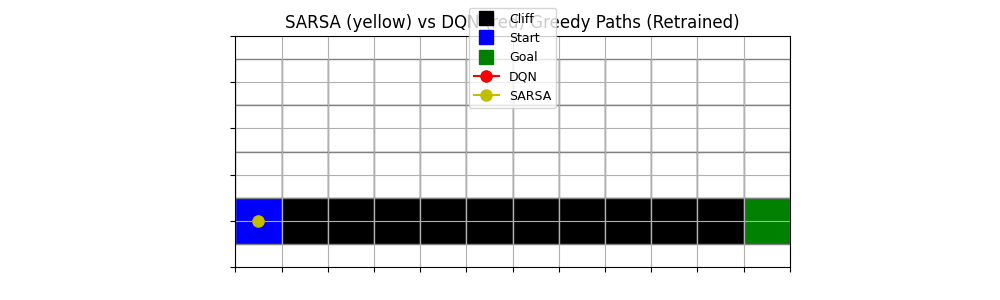

In [2]:

from IPython.display import Image

Image(filename='images/cliffwalking_paths.gif')

Each time a SARSA episode results in falling off a cliff
- a large negative value for $Q(s', a')$ is learned when $a'$ leads to falling off the cliff from state $s'$
- the large negative reward propagates back through all the preceding (safe) states and actions along the path
    - any path that *could* lead to $s'$ with some probability of $a'$ being chosen *becomes deprecated*
- so policy becomes biased toward moving far from the Cliff
- *even if* the action $a'$ was an *exploratory* action (that won't be repeated)

DQN always assumes the continuation of an episode from the current state is optimal
- the `max` prevents $a'$ from being chosen in state $s'$
- so any path that leads to $s'$ *does not become deprecated*




## SARSA vs DQN: Summary

| Feature                     | SARSA (On-Policy)                                             | DQN (Off-Policy)                                                 |
|:--------------------------- |:------------------------------------------------------------- |:---------------------------------------------------------------- |
| Policy Updated              | Behavior policy ($\epsilon$-greedy)                          | Greedy (optimal) policy                                          |
| Update Target               | $r + \gamma Q(s', a')$ (actual next action)                  | $r + \gamma \max{a'} Q(s', a')$ (max over all actions)        |
| Bias/Variance               | Higher bias, lower variance                                   | Lower bias, higher variance (risk of instability/overestimation) |
| Risk Awareness              | Accounts for exploration risk (safer in risky environments)   | Does not account for risk of exploratory actions                 |
| Performance in Large Spaces | Limited without function approx.                              | Handles large/continuous spaces with neural networks             |
| Experience Replay           | Possible but less common                                      | Standard in DQN                                                  |
| Stability                   | Often more stable, especially in risky/confusing environments | Can be less stable, especially with bad hyperparameters          |

# Learning via Code

[Here](RL_OnPolicy_vs_OffPolicy_code_examples.ipynb) is a notebook that demonstrates
- Q-Learning
    - with and without replay memor
- SARSA

## How Each Example Highlights a Salient Point

1. **Q-learning (Off-policy):**
    - **Purpose:** Demonstrates how the behavior policy (epsilon-greedy; explores randomly) differs from the target policy (greedy; always chooses highest Q-value).
    - **Salient Point:** Shows that updates use the greedy maximum Q-value (off-policy), even when the sampled action was exploratory.
2. **SARSA (On-policy):**
    - **Purpose:** Demonstrates on-policy learning where both the behavior and target policies are epsilon-greedy and always match.
    - **Salient Point:** The Q update uses the value of the exact next action chosen by the behavior policy, making sampling and updating fully aligned.
3. **Q-learning with Experience Replay Buffer:**
    - **Purpose:** Shows how experience transitions are stored in a replay buffer and reused for updates.
    - **Salient Point:** Illustrates how off-policy Q-learning leverages exploratory samples and batch updates from the buffer to improve sample efficiency and stabilize learning.


# Sources of Variance in RL

We introduced Variance as a way of comparing TD and MC for value-based methods.

But variance is present in many RL methods and is considered 
 a potential impediment to Learning via RL.
- bigger updates in
    - Value function for Value-based methods
    - Parameters for Policy-based methods
- can cause large changes in Policy
- which can lead to unstable training

We list the types of methods affected by each cause.

There multiple sources of Variance, which we summarize below
- stochastic environment
    - stochastic rewards and state transitions
- stochastic policy
- sparse rewards
    - per-episode vs per-step rewards
    - reward estimates become more noisy
- bootstrapping    


| Source of Variance             | Description                                                       | Methods Most Affected                |
|:-------------------------------|:-------------------------------------------------------------------|:--------------------------------------|
| Environmental Stochasticity   | Random rewards and transitions cause unpredictable outcomes        | Monte Carlo, TD, Policy Gradients    |
| Policy Stochasticity          | Probabilistic (non-deterministic) action selection                | MC, On-policy, Policy Gradients      |
| Long Trajectory Aggregation   | Returns summed over many steps compound the randomness             | Monte Carlo, n-step methods          |
| Sparse or Delayed Rewards     | Few positive signals lead to noisy estimates                       | Monte Carlo, Value-based             |
| Bootstrapping Error           | Using own predictions as targets introduces bias, but lowers variance | TD, Q-Learning                    |
| Credit Assignment Difficulty  | Uncertainty in linking actions to future rewards increases variance | Policy Gradients, MC                 |
| Sample Size & Exploration     | Insufficient samples or aggressive exploration cause wide fluctuations| All methods                       |
| Model/Optimization Instability| Neural network or optimizer issues amplify variance                | Deep RL, Policy Gradient methods     |
| Non-stationarity              | Changing environment or policy during training                     | All methods, esp. online learning    |

**Key Points:**  
- Variance comes from randomness in data, policy, training procedure, and modeling choices.  
- Some sources can be controlled with design choices (e.g., baselines, bootstrapping, averaging), while others are intrinsic to RL problems.

As we introduce new RL methods
- one motivation if to reduce variance

Some potential ways to reduce variance
- $n \gt 1$-step ahead Temporal Difference
- estimating updates in mini-batches
    - as in Gradient Descent


In [3]:
print("Done")

Done
